In [1]:
import pandas as pd

In [2]:
before = pd.read_csv('../../data/raw/before_data.csv', sep='|', parse_dates=['dt_entrance'])

In [3]:
after = pd.read_csv('../../data/raw/after_data.csv', sep='|', parse_dates=['dt_entrance'])

In [4]:
before['just_date'] = before['dt_entrance'].dt.date
after['just_date'] = after['dt_entrance'].dt.date

In [7]:
before_day = list(set(before['just_date']))
after_day =  list(set(after['just_date']))

In [8]:
len(before_day), len(after_day)

(286, 286)

In [9]:
before_day.sort()
after_day.sort()

In [10]:
import numpy as np
before_split = np.array_split(before_day, 41)
after_split = np.array_split(after_day, 41)

In [11]:
before_count = [len(before[before['just_date'].isin(row)]) for row in before_split]
after_count = [len(after[after['just_date'].isin(row)]) for row in after_split]

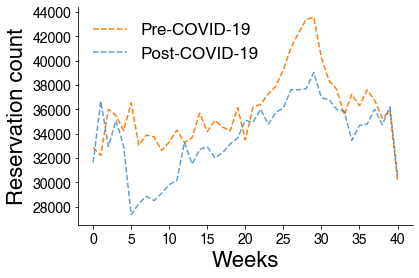

In [13]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
INPUT_FONT_FILE = '../../assets/Helvetica.ttf'
prop = font_manager.FontProperties(fname=INPUT_FONT_FILE, size=22)
mid_prop = font_manager.FontProperties(fname=INPUT_FONT_FILE, size=17)
tiny_prop = font_manager.FontProperties(fname=INPUT_FONT_FILE, size=14)

fig, ax = plt.subplots(1, 1)
ax.plot(before_count, '--',  color="tab:orange", label="Pre-COVID-19",
)
ax.plot(after_count, '--',    color="tab:blue",
    alpha=0.7,
    label="Post-COVID-19",
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for label in ax.get_xticklabels():
    label.set_fontproperties(tiny_prop)
for label in ax.get_yticklabels():
    label.set_fontproperties(tiny_prop)
    
ax.set_xlabel("Weeks", fontproperties=prop)
ax.set_ylabel("Reservation count", fontproperties=prop)

plt.legend(prop=mid_prop, frameon=False)
plt.savefig('figs/count_plot.pdf', bbox_inches='tight')